# Bank Marketing Campaign Analysis

*This project aims to analyze data from a bank marketing campaign to predict customer behavior using machine learning techniques. The dataset contains customer information and details about past marketing efforts.*

## Objective:
*Classification Task: Predict whether a client will subscribe to a term deposit (yes/no).*  
*Regression Task: Analyze the impact of numerical features (e.g., balance, duration) on customer behavior.*

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error


### 1.Load Dataset

In [ ]:
# Load Excel file
df = pd.read_excel("C:\\Users\\AS\\Downloads\\bank-full.xlsx")

# Display first 5 rows
df.head()

### 2️.Show Dataset Shape (Rows & Columns)

In [ ]:
# Show dataset shape
print("Dataset Shape:", df.shape)

### 3.Describe Statistical Summaries

In [ ]:
# Describe statistical summaries
print("Statistical Summary:\n", df.describe())

### 4.Check Skewness

In [ ]:
# Check skewness for numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Skewness:\n", df[numerical_cols].skew())


### 5.Handle Outliers

#### A) Identify Outliers using Box Plot

In [ ]:
# Detect outliers using a box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

#### B) Handle Outliers using IQR Method

In [ ]:
# Compute IQR (Interquartile Range)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers beyond 1.5 * IQR
df_no_outliers = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Original Shape: {df.shape}, New Shape after Outlier Removal: {df_no_outliers.shape}")


#### C) Handle Outliers using Capping

In [ ]:
# Define lower and upper percentile limits (5% and 95%)
lower_limit = df[numerical_cols].quantile(0.05)
upper_limit = df[numerical_cols].quantile(0.95)

# Apply capping (clipping) to each column
for col in numerical_cols:
    df[col] = df[col].clip(lower=lower_limit[col], upper=upper_limit[col])

# Verify changes with summary statistics
df[numerical_cols].describe()


### 6.Check for Missing Values

In [ ]:
# Check missing values
print("Missing Values in Dataset:\n", df.isnull().sum())


### Convert Categorical Data to Numerical

In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [ ]:
print(df.columns)  # Check if column names match


In [ ]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces and make lowercase
print(df.columns)  # Check again


In [ ]:
print(df.head())  # See current structure


In [ ]:
# Identify categorical columns correctly
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding only to existing columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical columns successfully encoded!")


### 7. Feature Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical columns successfully scaled!")
df.head()

In [ ]:
# Save the preprocessed dataset
df.to_csv("C:\\Users\\AS\\Downloads\\bank-full-processed.csv", index=False)
print("\n✅ Data Preprocessing Completed! File Saved as 'bank-full-processed.csv'")

In [ ]:
#  Load the preprocessed dataset
df = pd.read_csv("C:\\Users\\AS\\Downloads\\bank-full-processed.csv")
df.head()

## ➤ Classification

In [ ]:

X_class = df.drop(columns=['y_yes'])
y_class = df['y_yes']


In [ ]:
# Feature Importance
clf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
clf_fs.fit(X_class, y_class)
important_class_feats = pd.Series(clf_fs.feature_importances_, index=X_class.columns).sort_values(ascending=False).head(10)


In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(df[important_class_feats.index], y_class, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("✅ Classification Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

## ➤ Regression

In [ ]:

X_reg = df.drop(columns=['balance'])
y_reg = df['balance']
reg_fs = RandomForestRegressor(n_estimators=100, random_state=42)
reg_fs.fit(X_reg, y_reg)
important_reg_feats = pd.Series(reg_fs.feature_importances_, index=X_reg.columns).sort_values(ascending=False).head(10)



In [ ]:
# Train/Test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df[important_reg_feats.index], y_reg, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

In [ ]:
print("\n✅ Regression Performance:")
print("🔹 MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("🔹 MSE:", mean_squared_error(y_test_r, y_pred_r))


Best Classifier Params: {'max_depth': 10, 'n_estimators': 100}


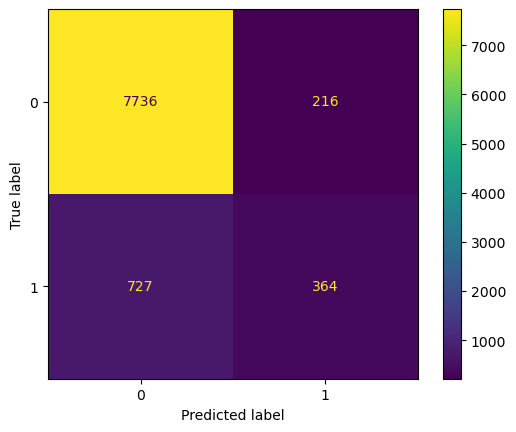

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score

# Grid Search for Classifier
param_grid = {'n_estimators': [100, 150], 'max_depth': [None, 10, 20]}
grid_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_clf.fit(X_train, y_train)

print("Best Classifier Params:", grid_clf.best_params_)
best_clf = grid_clf.best_estimator_

cm = confusion_matrix(y_test, best_clf.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


In [153]:
# Grid Search for Regressor
grid_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_reg.fit(X_train_r, y_train_r)
print("Best Regressor Params:", grid_reg.best_params_)

best_reg = grid_reg.best_estimator_
y_best_pred_r = best_reg.predict(X_test_r)
print("R² Score:", r2_score(y_test_r, y_best_pred_r))

Best Regressor Params: {'max_depth': 10, 'n_estimators': 150}
R² Score: 0.05923982384149862


In [155]:
import joblib

joblib.dump(best_clf, 'best_classifier_model.pkl')
joblib.dump(best_reg, 'best_regressor_model.pkl')

print("✅ Models saved successfully!")


✅ Models saved successfully!
